# RNA preentrenadas
## (_reconocimiento de imágenes_)
___

Existen numerosas redes neuronales artificiales (RNA ó _Artificial Neural Networks, ANN_) ya configuradas y entrenadas para distintas tareas como, por ejemplo, el reconocimiento de imágenes.


Es habitual que los investigadores publiquen, junto con sus trabajos, el código fuente y los parámetros (_pesos_) obtenidos durante el entrenamiento del modelo a partir de un conjunto de datos de referencia

## RN preentrenadas en pyTorch
---
El módulo **torchvision.models** contiene diversos modelos predefinidos


Los nombres en mayúsculas son clases Python que implementan dichos modelos


Los nombres en minúsculas son funciones que devuelven modelos instanciados a partir de dichas clases, en ocasiones con diferentes conjuntos de parámetros. Por ejemplo, _resnet101_ devuelve una instancia de *ResNet* con 101 capas, mientras que *resnet18* tiene 18 capas

In [7]:
import torch
from torchvision import models
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

### AlexNet
___
El modelo *AlexNet* ganó la competición [ILSVRC](http://www.image-net.org/challenges/LSVRC/) (_ImageNet Large Scale Visual Recognition Challenge_) de 2012, "barriendo" a sus competidores. 

En esta competición se evalúan algoritmos para la detección de objetos y la clasificación de imágenes. En concreto, el conjunto de datos (_dataset_) para la clasificación de imágenes según su contenido está formado por **1.2 millones** de imágenes etiquetadas con uno de entre **1.000 nombres** (por ejemplo: "gato")

*AlexNet*, que se basa en el empleo de redes neuronales convolucionales (CNN) entrenadas sobre GPU, es considerado uno de los trabajos más influyentes en la visión por computadora. 

Para ejecutar el modelo _AlexNet_ en una imagen de entrada, podemos instanciar un objeto de la clase correspondiente:

In [8]:
alexnet = models.AlexNet()
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Lo que acabamos de obtener es un objeto que replica la arquitectura de la red neuronal _AlexNet_. Sin embargo, esta red está "sin entrenar". Necesitaríamos un conjunto de imágenes de prueba, convenientemente etiquetadas, para que pueda "autoajustar" sus parámetros. Una vez entrenada, ya podríamos usar nuestra red para clasificar imágenes.

Las funciones proporcionadas por el módulo **torchvision.modules** nos permiten instanciar modelos ya preentrenados, es decir, con sus pesos internos ajustados. Veamos como.

### Clasificando imágenes con ResNet
___
El modelo _ResNet_ ganó varios de los concursosde la competición ILSVRC en 2015. Su arquitectura se basa en estructuras conocidas de células piramidales del cortex cerebral y supuso el inicio del desarrollo de redes neuronales convolucionales extremadamente profundas (_AlexNet_ tenía 8 capas frente a las 101 que genera _resnet101_)

Vamos a crear una instancia de _ResNet_ pero de forma que "venga" ya entrenada. En este caso, a partir del _dataset_ de **ImageNet** de 1.2 millones de imágenes y 1.000 categorías

In [9]:
resnet = models.resnet101(pretrained=True)

Echemos un vistazo a la estructura de nuestra ANN. Ésta está formada por numerosas capas (_layers_), cada una de ellas compuesta por múltiples unidades funcionales (_neuronas_), conectadas entre sí para la realización de diferentes operaciones. Finalmente, esta secuencia en cascada de filtros y operaciones no lineales, terminará en una capa final donde se generarán las puntuaciones (probabilidades) para cada una de las clases de salida

In [10]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Clasificando imágenes
---
Nuestra nueva red, referenciada por la variable _resnet_, puede ser invocada como una función, recibiendo como argumento una imagen y devolviendo, como resultado, qué es lo que la red neuronal acierta a "ver" en ella. En realidad, nos devolverá un vector con la probabilidades de que, lo que aperece en la imagen, sea cada una de las 1.000 palabras (_etiquetas_) con las que fue entrenada para clasificar imágenes.

Antes de que podamos hacer esto, necesitamos preprocesar nuestra imagen de entrada para ajustar su tamaño y rangos de los colores de los píxeles a los del set de entrenamiento. Para ello, el módulo **torchvision** nos proporciona las herramientas necesarias


In [11]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

Hemos definido una función (_preprocess_) que "ejecutará" una serie de acciones (_Compose_) sobre nuestras imágenes: la escalará a 256x256, la recortará a 224x224 alrededor del centro, la convertirá en un tensor de PyTorch (en este caso, un vector de 3 dimensiones: alto, ancho y color RGB) y, finalmente, normalizará sus componentes RGB a los valores de media (_mean_) y desviación estándar (_std_) del _dataset_ de entrenamiento.

Ahora es el momento de coger una de nuestras fotos favoritas, preprocesarla, y ver que nos dice RasNet de ella.

Para nuestro ejemplo, vamos a usar una foto de la mítica gata _Grumpy Cat_:

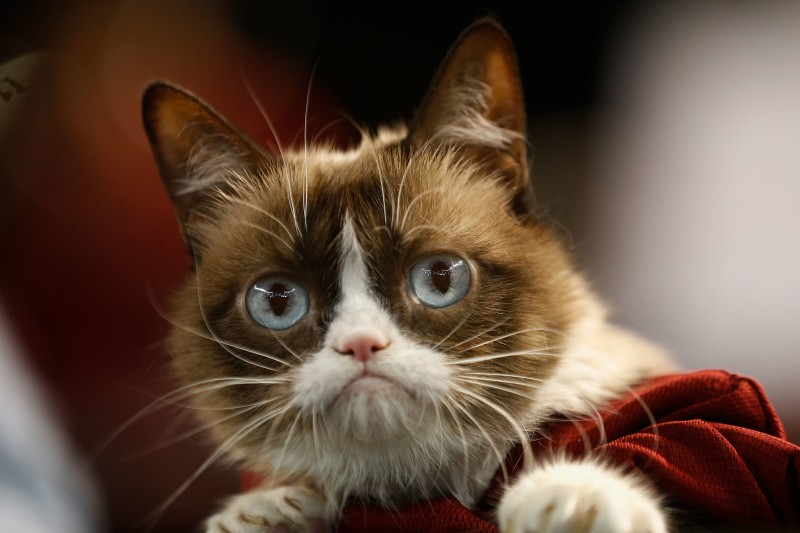

In [12]:
from PIL import Image
img = Image.open("grumpy_cat.jpg")
img

Una vez cargada la imagen, vamos a preprocesarla:

In [13]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

Ya estamos listos para "evaluar" la imagen con nuestra ANN. Para ello, necesitamos poner nuestro modelo en modo _eval_. A continuación le pasaremos la imagen de entrada, obteniendo como resultado un vector de probabilidades para cada una de las 1.000 clases definidas en el _dataset_ de _ImageNet_

In [14]:
resnet.eval()
out = resnet(batch_t)
print("probs:", out)

probs: tensor([[-2.3895e+00, -3.4987e-01, -3.0967e+00, -1.7179e+00, -2.4604e+00,
         -7.1939e-01, -3.1776e+00, -2.3792e+00, -1.6079e-02, -2.1908e+00,
         -1.2503e+00, -1.7762e+00, -1.0181e+00, -1.2235e+00, -2.5129e+00,
          6.4864e-01,  4.2432e+00,  2.3547e+00, -4.5395e-01, -2.3385e+00,
         -1.5516e+00, -1.9529e+00, -3.0289e+00, -1.9236e+00, -1.2527e+00,
         -2.1340e+00, -1.4938e+00, -1.2398e+00, -1.4159e+00, -1.3880e+00,
         -2.7829e+00, -2.9672e+00, -1.8058e+00, -4.8768e+00, -3.9140e+00,
         -1.7279e+00, -1.1903e+00, -1.1240e+00, -1.3082e+00, -2.9000e+00,
         -3.8672e+00,  6.1557e-02, -2.2136e+00,  1.7586e-01, -1.7301e+00,
         -2.3976e+00, -2.8641e+00, -1.9694e+00, -5.1610e+00, -4.4208e+00,
         -5.0108e+00,  9.5941e-02, -2.8522e-01, -9.5641e-01,  9.0314e-02,
         -3.3506e+00, -1.4909e+00, -1.0294e+00, -3.1752e+00,  4.2520e-01,
          4.7652e-03, -2.2386e+00, -9.1861e-01, -1.1139e+00, -1.9055e+00,
         -3.2524e+00,  2.0558e+

Necesitamos ahora encontrar la etiqueta de la clase que recibió la puntuación (probabilidad) más alta. Para ello, cargaremos una lista con las etiquetas con el mismo orden en que fue entrenada la red

In [16]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

Ahora, determinaremos el índice correspondiente a la entrada con la puntuación máxima y extraeremos la etiqueta de la lista anterior

In [17]:
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100
print(labels[index[0]], percentage[index[0]].item())

Siamese cat, Siamese 55.34495162963867


Nuestra red neuronal nos dice que es un _Gato Siamés_ con un probabilidad de un 55.34%

No parece una probabilidad demasiado alta! Vamos a ver que otras opciones consideraba...

In [18]:
_, indices = torch.sort(out, descending=True)
for idx in indices[0][:5]:
    print(labels[idx], percentage[idx].item())

Siamese cat, Siamese 55.34495162963867
Persian cat 22.229066848754883
Egyptian cat 7.8578290939331055
lynx, catamount 3.521223783493042
tabby, tabby cat 2.977794885635376


En realidad, dudaba entre varias razas de gato (siamés, persa,...)

Vamos a ponérselo ahora un poco más difícil con esta imagen:

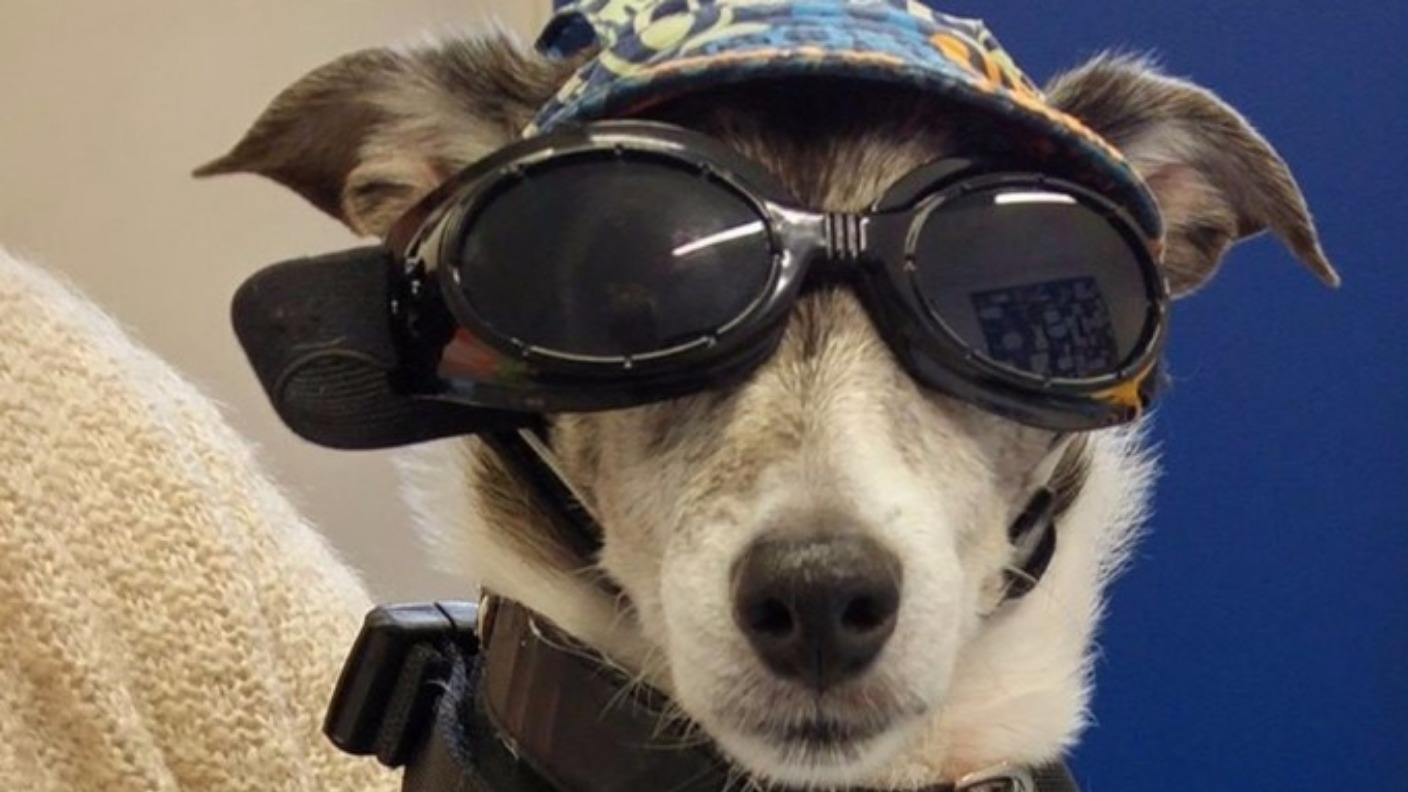

In [19]:
img2 = Image.open("devon_dog.jpg")
img2

Preprocesamos la imagen y la pasamos por la red neuronal...

In [20]:
# preprocesado
img_t = preprocess(img2)
batch_t = torch.unsqueeze(img_t, 0)

# clasificación
out = resnet(batch_t)

# resultados
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100
_, indices = torch.sort(out, descending=True)
for idx in indices[0][:5]:
    print(labels[idx], percentage[idx].item())

sunglass 64.24838256835938
sunglasses, dark glasses, shades 25.273296356201172
Pembroke, Pembroke Welsh corgi 0.9880086183547974
Chihuahua 0.8802477121353149
oxygen mask 0.8253093957901001


Como podemos ver, lo relevante para la red en este caso son las gafas de sol, y clasifica la imagen como tal. 

Y tú? cómo clasificarías esta imagen?

## Try it!
___

Modifica el siguiente código con la URL de la imagen que quieres que analice nuestra red neuronal


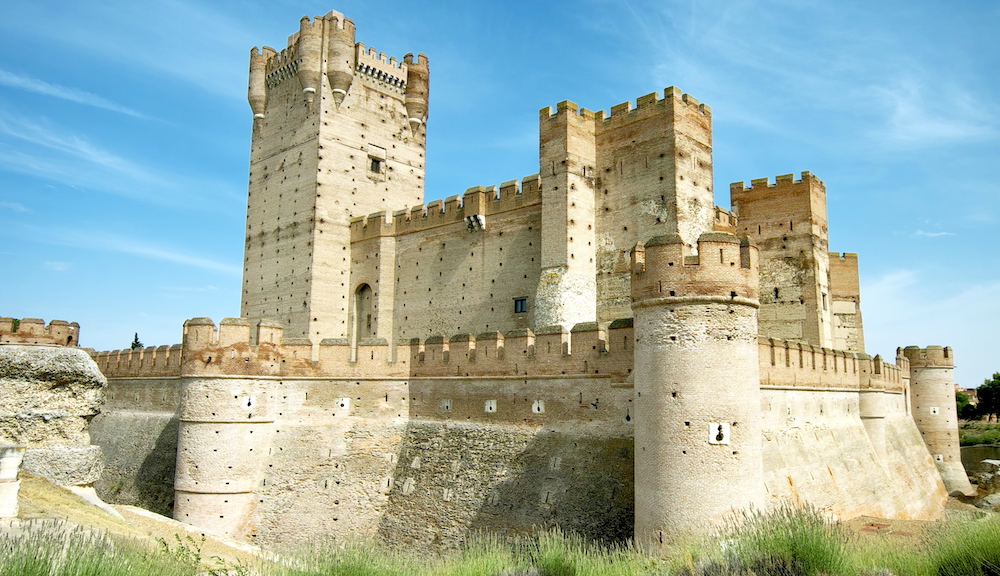

In [21]:
import urllib.request
import io

# -------------------------------------------------
# Introduce la URL aquí
URL = 'https://www.tegustaviajar.com/wp-content/uploads/2019/03/castillo-de-la-mota.jpg'
# -------------------------------------------------

with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())

img_try = Image.open(f)
img_try

Y ahora ejecuta la siguiente celda (parte del código anterior se ha agrupado en la función **guess_what()**)

In [22]:
from torchvision import transforms

def guess_what(img, resnet, labels, nres):
    """Procesa la imagen y muestra los resultados más probables
    
    Args:
        img: imagen a procesar
        resnet: CNN resnet previamente entrenada
        labels: colección de eiquetas para clasificar las imágenes
        nres: número de resultados
    """
    # preprocesado -----------------------------------------
    preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])
    img_t = preprocess(img)
    batch_t = torch.unsqueeze(img_t, 0)

    # clasificación ----------------------------------------
    out = resnet(batch_t)

    # muestra resultados -----------------------------------
    percentage = torch.nn.functional.softmax(out, dim=1)[0]*100
    _, indices = torch.sort(out, descending=True)

    for idx in indices[0][:nres]:
        print(labels[idx], percentage[idx].item())

# ----------------------------------------------------------
# Llamamos a la función aquí
# El último parámetro indica cuántos resultados quieres
guess_what(img_try, resnet, labels, 3)

castle 99.69700622558594
palace 0.14585819840431213
monastery 0.019073987379670143
